In [51]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing required libraries for the homework.

In [52]:
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import cross_val_score
from scipy import spatial
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import scikitplot as skplt
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')
stemmer = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
from sklearn.metrics import precision_score, recall_score

**STEP 1:** Load the Wikipedia GLoVE Word2Vec.

In [54]:
embeddings_dict = {}
with open("glove.6B.50d.txt", 'r') as f:
    for line in f:
        # print(line)
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [55]:
print(len(embeddings_dict))

400000


**STEP 2:** Defining functions for and finding how similar are these words:

                 Man and Woman

                 Chair and Throne

                 water and baby

In [56]:
def finding_nearest_embeddings(embedding1, embedding2):
    embedding_similarity = spatial.distance.cosine(embeddings_dict[embedding1], embeddings_dict[embedding2])
    print('Similarity between',embedding1,'and',embedding2,'is equal to:',embedding_similarity)

In [57]:
finding_nearest_embeddings("man", "woman")

Similarity between man and woman is equal to: 0.11396622657775879


In [58]:
finding_nearest_embeddings("chair", "throne")

Similarity between chair and throne is equal to: 0.7203190624713898


In [59]:
finding_nearest_embeddings("water", "baby")

Similarity between water and baby is equal to: 0.5918963849544525


**STEP 3:** Defining functions to provide analogies for the following:

             _____ is to King as Woman is to Man.

             _____ is to Princess as Man is to Woman.

             _____ is to a woman as a child is to an adult.

In [70]:
def finding_analogy(word_1, word_2, word_3, embeddings_dict):
    words = embeddings_dict.keys()
    max_cosine_sim = -999              
    best_word = None  
    analogy_word = []                

    analogy_word = sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word_2]-embeddings_dict[word_1], embeddings_dict[word]-embeddings_dict[word_3]))
        
    return analogy_word[1]

In [71]:
analogy_found = finding_analogy('man', 'woman', 'king', embeddings_dict)
print(analogy_found,'is to king as woman is to man')

queen  is to king as woman is to man


In [72]:
analogy_found = finding_analogy('woman', 'man', 'princess', embeddings_dict)
print(analogy_found,'is to princess as man is to woman')

prince is to princess as man is to woman


In [73]:
analogy_found = finding_analogy('adult', 'child', 'woman', embeddings_dict)
print(analogy_found,'is to woman as child is to adult')

mother is to woman as child is to adult


**STEP 4:** Applying Naive-Bayes Classifier on the Spam-Ham dataset and comparing with SVM classifier.

In [60]:
emotions = [":)", ":(", ":p", ":D", "-_-", ":o"]  

In [61]:
def char_flag(l):
    if l <= 40:
        return 1
    elif l <= 60:
        return 2
    elif l <= 80:
        return 3
    elif l <= 120:
        return 4
    elif l <= 160:
        return 5
    else:
        return 6 

In [62]:
stop_words = []
def text_process(mess):
    no_punct = re.sub('[^A-Za-z ]+', '', mess.lower())
    return np.array([stemmer.stem(word) for word in no_punct.split() if word not in stop_words])

In [63]:
def preprocessing_text():
    for d, ln in zip(messages_data, token_4):
        token_1.append(d)
        token_2.append(d.count('$'))
        x =re.sub('[^0-9 ]+', '', d.lower())
        token_3.append(len(x))
        token_5.append(char_flag(ln))
        if (re.sub(r'[^://@]', '', d.lower())) is not '':
            token_6.append(1)
        else:
            token_6.append(0)
        token_7.append(len(x.split()))
        for emoji in emotions:
            if(re.search(re.escape(emoji), d)):
                token_8.append(1)
            else:
                token_8.append(0)
    return np.array(
        [np.array([token_1[i], token_2[i], token_3[i], token_4[i], token_5[i], token_6[i], 
                   token_7[i],token_8[i]], dtype=object) for i in
         range(len(messages_data))])

In [64]:
def data_mapper():
    data = preprocessing_text()
    labels = ['message','f1','f2','f3','f4','f5','f6','f7']
    df = pd.DataFrame.from_records(data,columns=labels)
    mapper = DataFrameMapper([
    (['f1', 'f2','f3','f4','f5','f6','f7'], None),
    ('message',CountVectorizer(analyzer = text_process,ngram_range=(2, 2)))])
    X=mapper.fit_transform(df)
    return X

In [65]:
if __name__ == "__main__":
   
    messages = pd.read_csv("spam.csv", encoding='latin-1')
    print(messages)
    messages = messages.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])
    print(messages)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [66]:
messages['length'] = messages['v2'].apply(len)
messages_data = messages['v2']
messages_labels = messages['v1']
print(messages) 

        v1                                                 v2  length
0      ham  Go until jurong point, crazy.. Available only ...     111
1      ham                      Ok lar... Joking wif u oni...      29
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3      ham  U dun say so early hor... U c already then say...      49
4      ham  Nah I don't think he goes to usf, he lives aro...      61
...    ...                                                ...     ...
5567  spam  This is the 2nd time we have tried 2 contact u...     161
5568   ham              Will Ì_ b going to esplanade fr home?      37
5569   ham  Pity, * was in mood for that. So...any other s...      57
5570   ham  The guy did some bitching but I acted like i'd...     125
5571   ham                         Rofl. Its true to its name      26

[5572 rows x 3 columns]


In [67]:
token_1 = []
token_2 = []
token_3 = []
token_4 = messages['length']
token_5 = []
token_6 = []
token_7 = []
token_8 = []
    
freq = pd.Series(' '.join(messages_data).split()).value_counts()
print(freq)

to           2134
you          1622
I            1466
a            1327
the          1197
             ... 
AOM             1
Box61,M60       1
1ER             1
Ages            1
Rofl.           1
Length: 15585, dtype: int64


In [68]:
stop_words = stopwords.words('english')
print(stop_words)
stop_words.extend(freq[-9268:].index)
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [69]:
mapped_data = data_mapper()

trainset, testset, trainlabel, testlabel = train_test_split(mapped_data, messages_labels, test_size=0.33, random_state=42)  

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


confusion_matrix_SVM:  [[1582    5]
 [  72  180]]


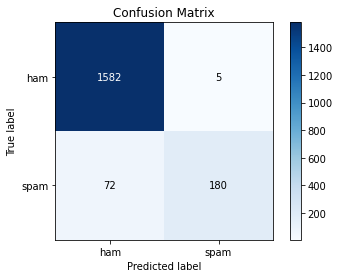

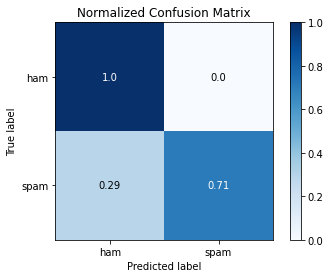

In [74]:
SVM = svm.SVC()
SVM.fit(trainset, trainlabel)
predicted_values_svm = SVM.predict(testset)

#Accuracy
acurracy_SVM = accuracy_score(testlabel, predicted_values_svm)

#5 fold cross validation
clf = svm.SVC(kernel='rbf', C=1)
scores = cross_val_score(clf, trainset, trainlabel, cv=5)

#confusion matrix
confusion_matrix_SVM = confusion_matrix(testlabel,predicted_values_svm,labels=["ham","spam"] )
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=False)
skplt.metrics.plot_confusion_matrix(testlabel,predicted_values_svm, normalize=True)

print('confusion_matrix_SVM: ', confusion_matrix_SVM)
plt.show()

In [75]:
print("acurracy_SVM " + str(acurracy_SVM))

acurracy_SVM 0.9581294181620446


In [76]:
# Precision
precision_svm = precision_score(testlabel, predicted_values_svm, pos_label="ham")
print('precision_SVM ' + str(precision_svm))

precision_SVM 0.9564691656590084


confusion_matrix_Naive_Bayes:  [[1341  246]
 [  31  221]]


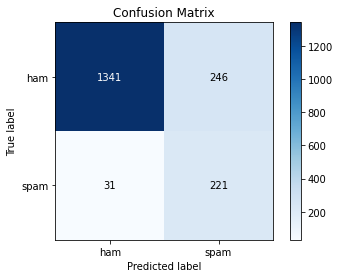

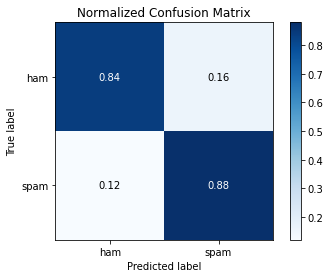

In [77]:
naive_bayes = GaussianNB()
naive_bayes.fit(trainset, trainlabel)
predicted_nb = naive_bayes.predict(testset)

#Accuracy
acurracy_gnb = accuracy_score(testlabel, predicted_nb)

#confusion matrix
confusion_matrix_gnb = confusion_matrix(testlabel,predicted_nb,labels=["ham","spam"] )
skplt.metrics.plot_confusion_matrix(testlabel,predicted_nb, normalize=False)
skplt.metrics.plot_confusion_matrix(testlabel,predicted_nb, normalize=True)

print('confusion_matrix_Naive_Bayes: ', confusion_matrix_gnb)
plt.show()

In [78]:
print("acurracy_Naive_Bayes " + str(acurracy_gnb))

acurracy_Naive_Bayes 0.8493746601413812


In [79]:
# Precision
precision_nb = precision_score(testlabel, predicted_nb, pos_label="ham")
print('precision_Naive_Bayes ' + str(precision_nb))

precision_Naive_Bayes 0.9774052478134111


Compared to SVM, Naive bayes performs better in terms of precision which is a better suited metric for Spam-ham classification than accuracy.